1.Построение статистики по входящим в последовательность ДНК нуклеотидам 
для каждого гена (например: [A - 46, C - 66, G - 23, T - 34])

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
with open("C:/Users/ekant/Desktop/dna.fasta.txt") as inf:
    s = inf.read().split('\n')
inf.close()

In [5]:
d = {}
for line in s:
    if line.startswith(">"):
        name = line
        d[name] = ""
    else:
        d[name] += line
d

{'>HSBGPG Human gene for bone gla protein (BGP)': 'GGCAGATTCCCCCTAGACCCGCCCGCACCATGGTCAGGCATGCCCCTCCTCATCGCTGGGCACAGCCCAGAGGGTATAAACAGTGCTGGAGGCTGGCGGGGCAGGCCAGCTGAGTCCTGAGCAGCAGCCCAGCGCAGCCACCGAGACACCATGAGAGCCCTCACACTCCTCGCCCTATTGGCCCTGGCCGCACTTTGCATCGCTGGCCAGGCAGGTGAGTGCCCCCACCTCCCCTCAGGCCGCATTGCAGTGGGGGCTGAGAGGAGGAAGCACCATGGCCCACCTCTTCTCACCCCTTTGGCTGGCAGTCCCTTTGCAGTCTAACCACCTTGTTGCAGGCTCAATCCATTTGCCCCAGCTCTGCCCTTGCAGAGGGAGAGGAGGGAAGAGCAAGCTGCCCGAGACGCAGGGGAAGGAGGATGAGGGCCCTGGGGATGAGCTGGGGTGAACCAGGCTCCCTTTCCTTTGCAGGTGCGAAGCCCAGCGGTGCAGAGTCCAGCAAAGGTGCAGGTATGAGGATGGACCTGATGGGTTCCTGGACCCTCCCCTCTCACCCTGGTCCCTCAGTCTCATTCCCCCACTCCTGCCACCTCCTGTCTGGCCATCAGGAAGGCCAGCCTGCTCCCCACCTGATCCTCCCAAACCCAGAGCCACCTGATGCCTGCCCCTCTGCTCCACAGCCTTTGTGTCCAAGCAGGAGGGCAGCGAGGTAGTGAAGAGACCCAGGCGCTACCTGTATCAATGGCTGGGGTGAGAGAAAAGGCAGAGCTGGGCCAAGGCCCTGCCTCTCCGGGATGGTCTGTGGGGGAGCTGCAGCAGGGAGTGGCCTCTCTGGGTTGTGGTGGGGGTACAGGCAGCCTGCCCTGGTGGGCACCCTGGAGCCCCATGTGTAGGGAGAGGAGGGATGGGCATTTTGCACGGGGGCTGATGCCACCACGTCGGGTGTCTC

In [6]:
def nucleotid_count(s):
      return s.count("A"), s.count("C"), s.count("G"), s.count("T")

In [7]:
for key, value in d.items():
    d[key] = dict(zip(['A', 'C', 'G', 'T'], nucleotid_count(value)))
d

{'>HSBGPG Human gene for bone gla protein (BGP)': {'A': 217,
  'C': 409,
  'G': 373,
  'T': 232},
 '>HSGLTH1 Human theta 1-globin gene': {'A': 146,
  'C': 362,
  'G': 357,
  'T': 155}}

In [8]:
df = pd.DataFrame(d)

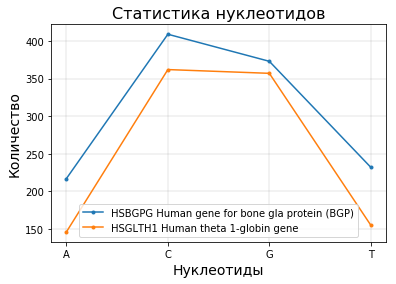

In [9]:
plt.plot(df, marker='.')
plt.grid(True, color='grey', linestyle='-', linewidth=0.2)
plt.title('Статистика нуклеотидов', fontsize=16)
plt.xlabel('Нуклеотиды', fontsize=14)
plt.ylabel("Количество", fontsize=14)
plt.gca().legend(('HSBGPG Human gene for bone gla protein (BGP)','HSGLTH1 Human theta 1-globin gene'))
plt.show()

In [20]:
x = df['>HSBGPG Human gene for bone gla protein (BGP)'].to_numpy()
y = df['>HSGLTH1 Human theta 1-globin gene'].to_numpy()

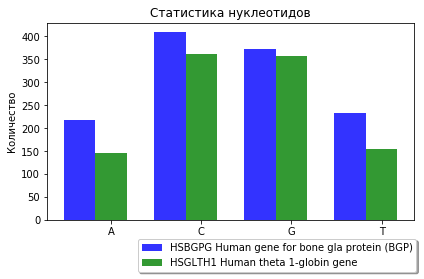

In [38]:
n_groups = 4
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, x, bar_width,
alpha=opacity,
color='b',
label='HSBGPG Human gene for bone gla protein (BGP)')

rects2 = plt.bar(index + bar_width, y, bar_width,
alpha=opacity,
color='g',
label='HSGLTH1 Human theta 1-globin gene')

plt.xlabel('Нуклеотиды')
plt.ylabel('Количество')
plt.title('Статистика нуклеотидов')
plt.xticks(index + bar_width, ('A', 'C', 'G', 'T'))
plt.legend(loc='upper right', bbox_to_anchor=(1.02, -0.07), fancybox=True, shadow=True)

plt.tight_layout()
plt.show()